In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df=df.drop(["availability",'area_type','society','balcony'],axis=1)

In [5]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
df2=df.copy()

In [7]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Data cleaning

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3=df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
type(df3)

pandas.core.frame.DataFrame

In [13]:
df3["BHK"]=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Vikrant Chauhan\AppData\Local\Temp\ipykernel_3136\3382407167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"]=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [14]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def get_float(x):
        try:
            float(x)
        except:
            return False
        return True

In [17]:
df3[~df3['total_sqft'].apply(lambda x: get_float(x))].head(30)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def get_sq_meter(x):
    temp=get_float(x)
    if temp==False:
        if 'S' in x:
            return True
    else:
        return False

In [19]:
# df3[df3['total_sqft'].apply(lambda x: get_sq_meter(x))]
# Error:Cannot mask with non-boolean array containing NA / NaN values

In [20]:
get_float("abc")

False

In [21]:
get_sq_meter("23")

False

In [22]:
get_sq_meter("23S")

True

In [23]:
df4=df3.copy()

In [24]:
# def get_sqft(x):
#     temp=get_float(x)
#     if(temp==False):
#         if '-' in x:
#             s=x.split('-')
#             return float((float(s[0])+float(s[1]))/2)
#         else if :
            
#             numeric_part = x.search(r'\d+', x)
#             return float(numeric_part.group()) if numeric_part else None
            
#     else :
#         return x

In [25]:
def get_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [26]:
df4.total_sqft=df4.total_sqft.apply(lambda x:get_sqft(x))

In [27]:
df4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [28]:
df4[~df4.total_sqft.apply(lambda x:get_float(x))]

,location,size,total_sqft,bath,price,BHK


In [29]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
location_count=df.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
location_count

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [32]:
type(location_count)

pandas.core.series.Series

In [33]:
location_count_list=location_count[location_count<=10]

In [34]:
location_count_list

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [35]:
df5.location=df5["location"].apply(lambda x: 'other' if x in location_count_list else x)

In [36]:
df5[df5.location=="Whitefield"]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
27,Whitefield,3 BHK,1610.0,3.0,81.00,3,5031.055901
47,Whitefield,2 BHK,1459.0,2.0,94.82,2,6498.971899
...,...,...,...,...,...,...,...
13235,Whitefield,3 BHK,1730.0,3.0,125.00,3,7225.433526
13257,Whitefield,3 BHK,1453.0,2.0,58.00,3,3991.741225
13258,Whitefield,1 BHK,877.0,1.0,59.00,1,6727.480046
13299,Whitefield,4 BHK,2856.0,5.0,154.50,4,5409.663866


In [37]:
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
len(df5.location.unique())

242

In [39]:
df6=df5[~(df5['total_sqft']/df5["BHK"]<300)]

In [40]:
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5.shape

(13246, 7)

In [42]:
df6.shape

(12502, 7)

In [43]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# This is how to group

In [44]:
temp_df_=pd.DataFrame()
for  key, subdf in df6.groupby('location'):
    temp_df_=pd.concat([temp_df_,subdf],ignore_index=True)
#     print(subdf.shape[0])
#     print(subdf.BHK)
#     print(key)
#     print(subdf.values)
    

In [45]:
temp_df_

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 Bedroom,1200.0,3.0,160.00,3,13333.333333
...,...,...,...,...,...,...,...
12497,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
12498,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
12499,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
12500,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [46]:
def filter_price(df):
    temp_df=pd.DataFrame()
    for  key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        temp_df=pd.concat([reduced_df,temp_df],ignore_index=True)
    return temp_df
        

In [47]:
df7=filter_price(df6)

In [48]:
df7.tail(30)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
10214,1st Phase JP Nagar,3 BHK,1590.0,3.0,131.0,3,8238.993711
10215,1st Phase JP Nagar,3 BHK,2180.0,3.0,210.0,3,9633.027523
10216,1st Phase JP Nagar,2 BHK,1180.0,2.0,88.5,2,7500.000000
10217,1st Phase JP Nagar,2 BHK,1200.0,2.0,86.0,2,7166.666667
10218,1st Phase JP Nagar,2 BHK,1394.0,2.0,85.0,2,6097.560976
10219,1st Phase JP Nagar,3 BHK,2077.0,3.0,175.0,3,8425.613866
10220,1st Phase JP Nagar,4 BHK,4550.0,2.0,240.0,4,5274.725275
10221,1st Phase JP Nagar,2 BHK,1205.0,2.0,85.0,2,7053.941909
10222,1st Phase JP Nagar,4 BHK,2615.0,5.0,222.0,4,8489.483748
10223,1st Phase JP Nagar,2 BHK,900.0,2.0,75.0,2,8333.333333


In [49]:
import matplotlib.pyplot as plt

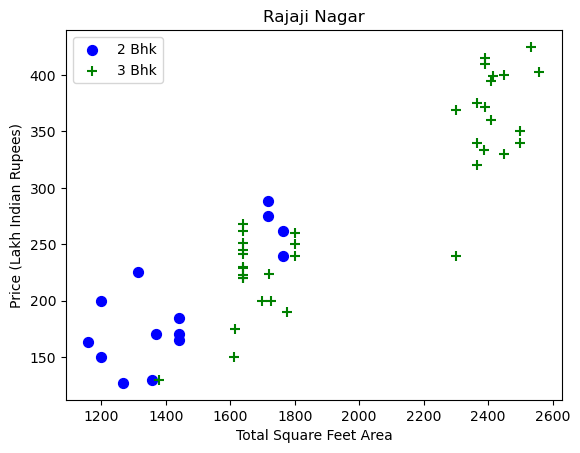

In [50]:
 def scatter_plot(df,loc):
    df2=df[(df.location==loc) & (df.BHK==2)]
    df3=df[(df.location==loc) & (df.BHK==3)]
#     matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(df2.total_sqft,df2.price,color='blue',label='2 Bhk',s=50)
    plt.scatter(df3.total_sqft,df3.price,color='green',label='3 Bhk',s=50,marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(loc)
    plt.legend()
    
scatter_plot(df7,"Rajaji Nagar")

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape


(7342, 7)

In [52]:
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
2,other,1 RK,510.0,1.0,25.25,1,4950.980392
4,other,1 BHK,600.0,1.0,38.00,1,6333.333333
7,other,2 BHK,1500.0,2.0,185.00,2,12333.333333
8,other,2 BHK,840.0,2.0,45.00,2,5357.142857
...,...,...,...,...,...,...,...
10238,Devarachikkanahalli,3 BHK,1417.0,2.0,76.00,3,5363.443896
10239,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.447154
10240,Devarachikkanahalli,3 BHK,1705.0,3.0,75.00,3,4398.826979
10241,Devarachikkanahalli,2 BHK,1116.0,2.0,47.00,2,4211.469534


In [53]:

df8[df8.bath>10]


,location,size,total_sqft,bath,price,BHK,price_per_sqft
551,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
640,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
1379,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
1711,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
4977,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [54]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7264, 7)

In [55]:
df9

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
2,other,1 RK,510.0,1.0,25.25,1,4950.980392
4,other,1 BHK,600.0,1.0,38.00,1,6333.333333
7,other,2 BHK,1500.0,2.0,185.00,2,12333.333333
8,other,2 BHK,840.0,2.0,45.00,2,5357.142857
...,...,...,...,...,...,...,...
10238,Devarachikkanahalli,3 BHK,1417.0,2.0,76.00,3,5363.443896
10239,Devarachikkanahalli,2 BHK,1230.0,2.0,58.00,2,4715.447154
10240,Devarachikkanahalli,3 BHK,1705.0,3.0,75.00,3,4398.826979
10241,Devarachikkanahalli,2 BHK,1116.0,2.0,47.00,2,4211.469534


In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,other,2770.0,4.0,290.00,3
2,other,510.0,1.0,25.25,1
4,other,600.0,1.0,38.00,1


In [57]:
df10.shape

(7264, 5)

Modeling Start

In [58]:
dummies=pd.get_dummies(df10.location)

In [59]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [61]:
df11

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,other,2770.0,4.0,290.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,510.0,1.0,25.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other,600.0,1.0,38.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,other,1500.0,2.0,185.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,other,840.0,2.0,45.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,Devarachikkanahalli,1417.0,2.0,76.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,Devarachikkanahalli,1230.0,2.0,58.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,Devarachikkanahalli,1705.0,3.0,75.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,Devarachikkanahalli,1116.0,2.0,47.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df11.drop(['location'],axis=1)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,290.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,1.0,25.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1.0,38.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1500.0,2.0,185.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,840.0,2.0,45.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1417.0,2.0,76.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1230.0,2.0,58.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1705.0,3.0,75.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1116.0,2.0,47.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y=df11.price

In [64]:
df12=df11.drop(['price','location'],axis=1)

In [65]:
df12

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1500.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,840.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1417.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1705.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,1116.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y.head(3)

0    290.00
2     25.25
4     38.00
Name: price, dtype: float64

In [67]:
len(y)

7264

Finding the best model using hyper tunning method

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [69]:
def find_best_model_using_gridsearchcv(df12,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(df12,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(df12,y)

C:\Users\Vikrant Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Vikrant Chauhan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import ma

C:\Users\Vikrant Chauhan\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.857409,{'normalize': True}
1,lasso,0.710431,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.731901,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


from above we can say that linear regression is best model

In [70]:
cv=ShuffleSplit(n_splits=3,test_size=0.2,random_state=0)
lr_score=cross_val_score(LinearRegression(),df12,y,cv=cv)
lr_score

array([0.8338521 , 0.86051589, 0.85520967])

Creating the linear regression model

In [71]:
lr_model=LinearRegression()
lr_model.fit(df12,y)

LinearRegression()

In [72]:
loc_index=np.where(df11.columns=='BHK')

In [73]:
loc_index

(array([4], dtype=int64),)

In [74]:
loc_index=np.where(df11.columns=='BHK')[0]
loc_index

array([4], dtype=int64)

In [75]:
loc_index=np.where(df11.columns=='BHK')[0][0]
loc_index

4

In [76]:
def predict_price(loc,total_sqft,bath,BHK):
    loc_index=np.where(df12.columns==loc)[0][0]
    set_val=np.zeros(len(df12.columns))
    set_val[0]=total_sqft
    set_val[1]=bath
    set_val[2]=BHK
    return lr_model.predict([set_val])
    
    

In [77]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Vikrant Chauhan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.99601497])

Saving the model

In [78]:
import pickle
with open('home_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [79]:
import json
columns = {
    'data_columns' : [col.lower() for col in df12.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))